Notebook initialization:

You need to run the next 3 cells!

In [1]:
# import necessary modules
# uncomment to get plots displayed in notebook
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy_sz import Class
from scipy.optimize import fsolve
from scipy.interpolate import interp1d
import math

Metal device set to: Apple M1 Pro


2023-02-19 23:54:47.111838: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-19 23:54:47.111955: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Esthetic definitions for the plots

In [2]:
font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
plt.rcParams["figure.figsize"] = [3.0,2.0]

Common settings for cosmological parameters and other CLASS parameters

In [14]:
common_settings = {
                   # LambdaCDM parameters
                   'H0':67.556,
                   'omega_b':0.022032,
                   'omega_cdm':0.12038,
                   # 'sigma8': 0.831,
                   'ln10^{10}A_s': 3.047,
                   'n_s': 0.9665,
                   'tau_reio':0.0925,
                   # Take fixed value for primordial Helium (instead of automatic BBN adjustment)
                   'YHe':0.246,
}


# Halo model galaxy power spectra

In [22]:
%%time
M = Class()
M.set(common_settings)
M.set({
'output' : 'galn_galn_1h,galn_galn_2h',
'galaxy_samples_list_num' : 3, # the number of galaxy samples
'galaxy_samples_list' : '1,2,4', # the id string of each sample, can be any integer
'full_path_and_prefix_to_dndz_ngal':'/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/WISC_bin3_ngal_example'
})
M.set({# class_sz parameters:

'mass function': 'T08M200c',
'concentration parameter' : 'D08',
'hm_consistency': 1,

'delta for galaxies' : '200c',

# HOD parameters
'sigma_log10M_HOD_ngal_0' : 0.69,
'alpha_s_HOD_ngal_0' :  1.30,
'M1_prime_HOD_ngal_0' : 5.03e12, # Msun/h
'M_min_HOD_ngal_0' : 6.25e11, # Msun/h
'M0_HOD_ngal_0' : 0,  # Msun/h
'x_out_truncated_nfw_profile_satellite_galaxies_ngal_0' : 1.09,    
'f_cen_HOD_ngal_0' : 1.,   
    
'sigma_log10M_HOD_ngal_1' : 0.79,
'alpha_s_HOD_ngal_1' :  1.30,
'M1_prime_HOD_ngal_1' : 5.43e12, # Msun/h
'M_min_HOD_ngal_1' : 6.15e11, # Msun/h
'M0_HOD_ngal_1' : 0,  # Msun/h
'x_out_truncated_nfw_profile_satellite_galaxies_ngal_1' : 1.19,  
'f_cen_HOD_ngal_1' : 1.,    
    
'sigma_log10M_HOD_ngal_2' : 0.49,
'alpha_s_HOD_ngal_2' :  1.70,
'M1_prime_HOD_ngal_2' : 6.03e12, # Msun/h
'M_min_HOD_ngal_2' : 7.25e11, # Msun/h
'M0_HOD_ngal_2' : 0,  # Msun/h
'x_out_truncated_nfw_profile_satellite_galaxies_ngal_2' : 0.89,  
'f_cen_HOD_ngal_2' : 1.,

'M0 equal M_min (HOD)'  : 'no',



'M_min' : 1e11*common_settings['H0']/100,
'M_max' : 5e15*common_settings['H0']/100,
# 'ndim_masses' : 100,
    
    
'z_min' : 0.,
'z_max' : 3.,
'ndim_redshifts' : 80,
    
    
'dlogell' : 0.3,
'ell_max' : 5000.0,
'ell_min' : 2.0,


    
# # precisions params:
# 'non_linear' : 'halofit',
# 'k_min_for_pk_class_sz' :  0.001,
# 'k_max_for_pk_class_sz' :  60.0,
# 'k_per_decade_class_sz' :  50,
# 'P_k_max_h/Mpc' :  50.0,

    
'redshift_epsabs' : 1e-40,
'redshift_epsrel' : 0.001,
'mass_epsabs' : 1e-40,
'mass_epsrel' : 0.001    
    
        })
        
# M.compute()
M.compute_class_szfast()
cl_galn_galn = M.cl_galn_galn()

CPU times: user 5.88 s, sys: 149 ms, total: 6.03 s
Wall time: 973 ms


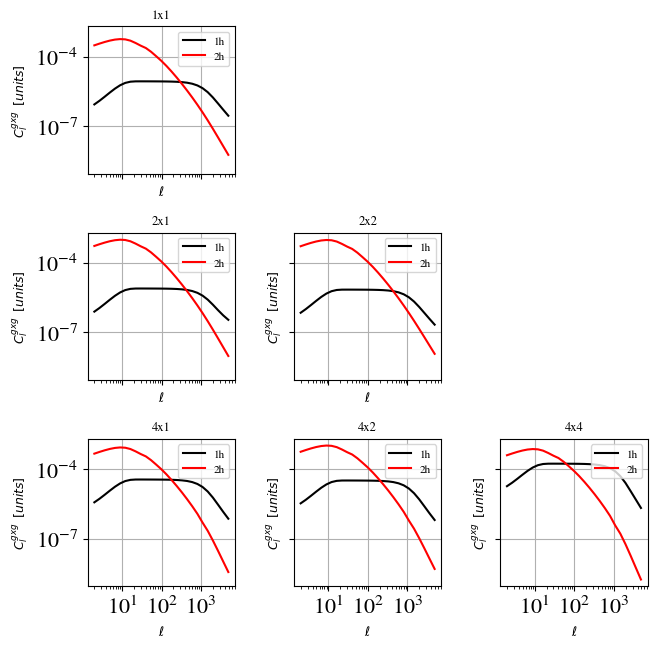

In [23]:

plot_dim = int(1/2*(-1 + np.sqrt(1 + 8*len(cl_galn_galn.keys()))))
fig, axes = plt.subplots(figsize=(7, 7), sharex=True, 
                         sharey=True, 
                         ncols=plot_dim, 
                         nrows=plot_dim,
                         )
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
# x = np.linspace(0, 10, 100)
ik = 0
for i in range(plot_dim):
    for j in range(plot_dim):
        if i<j:
            axes[i, j].axis('off')
        else:
            kk = list(cl_galn_galn.keys())[ik]
            ik+=1
            # axes[i, j].plot(x, np.sin((i+j) *x))
            axes[i, j].set_title(kk,size=9)
            axes[i, j].set_xlabel(r"$\ell$",fontsize=9)
            axes[i, j].set_ylabel(r"$C_l^{gxg} \,\,\, [units]$",fontsize=9)

            axes[i, j].grid()
            #
            cl = cl_galn_galn[kk]
            fac = np.asarray(cl['ell'])*(np.asarray(cl['ell'])+1.)/2./np.pi

            axes[i, j].loglog(cl['ell'],np.asarray(cl['1h'])/fac,'k-',label=r'1h')
            axes[i, j].loglog(cl['ell'],np.asarray(cl['2h'])/fac,'r-',label=r'2h')
            axes[i, j].legend(loc=1,fontsize=8)

# Halofit method for galaxy power spectra

In [11]:
%%time
M = Class()
M.set(common_settings)
M.set({
'output' : 'galn_galn_hf',
'galaxy_samples_list_num' : 3, # the number of galaxy samples
'galaxy_samples_list' : '1,2,4', # the id string of each sample, can be any integer
'full_path_and_prefix_to_dndz_ngal':'/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/WISC_bin3_ngal_example'
})
M.set({# class_sz parameters:
    
'z_min' : 0.,
'z_max' : 3.,
'ndim_redshifts' : 100,
    

'effective_galaxy_bias_ngal_0' : 1.3,
'effective_galaxy_bias_ngal_1' : 1.7,
'effective_galaxy_bias_ngal_2' : 2.7,
   
    

'dlogell' : 0.3,
'ell_max' : 5000.0,
'ell_min' : 2.0,

# primordial non-Gaussianity:
'use scale dependent bias (from non Gaussianity)': 1,
'fNL' : 1e-1,
    
# precisions params:
'non_linear' : 'halofit',
'k_min_for_pk_class_sz' :  0.001,
'k_max_for_pk_class_sz' :  60.0,
'k_per_decade_class_sz' :  50,
'P_k_max_h/Mpc' :  50.0,

    
'redshift_epsabs' : 1e-40,
'redshift_epsrel' : 0.0001,


    
        })
        
M.compute()
cl_galn_galn = M.cl_galn_galn()

CPU times: user 1.15 s, sys: 9.93 ms, total: 1.16 s
Wall time: 242 ms


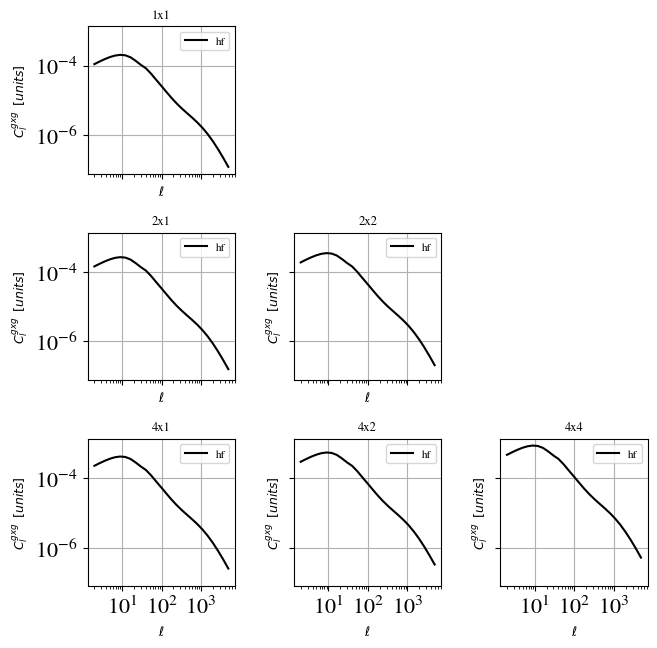

In [12]:

plot_dim = int(1/2*(-1 + np.sqrt(1 + 8*len(cl_galn_galn.keys()))))
fig, axes = plt.subplots(figsize=(7, 7), sharex=True, 
                         sharey=True, 
                         ncols=plot_dim, 
                         nrows=plot_dim,
                         )
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
# x = np.linspace(0, 10, 100)
ik = 0
for i in range(plot_dim):
    for j in range(plot_dim):
        if i<j:
            axes[i, j].axis('off')
        else:
            kk = list(cl_galn_galn.keys())[ik]
            ik+=1
            # axes[i, j].plot(x, np.sin((i+j) *x))
            axes[i, j].set_title(kk,size=9)
            axes[i, j].set_xlabel(r"$\ell$",fontsize=9)
            axes[i, j].set_ylabel(r"$C_l^{gxg} \,\,\, [units]$",fontsize=9)

            axes[i, j].grid()
            #
            cl = cl_galn_galn[kk]
            fac = np.asarray(cl['ell'])*(np.asarray(cl['ell'])+1.)/2./np.pi

            axes[i,j].loglog(cl['ell'],np.asarray(cl['hf'])/fac,'k-',label=r'hf')
            axes[i, j].legend(loc=1,fontsize=8)

# Halo model galaxy-cmb lensing power spectra

In [29]:
%%time
M = Class()
M.set(common_settings)
M.set({
# 'output' : 'gal_lens_1h,gal_lens_2h,galn_lens_1h,galn_lens_2h',
'output' : 'galn_lens_1h,galn_lens_2h',
'galaxy_samples_list_num' : 3, # the number of galaxy samples
'galaxy_samples_list' : '1,2,4', # the id string of each sample, can be any integer
'full_path_and_prefix_to_dndz_ngal':'/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/WISC_bin3_ngal_example',
'full_path_to_dndz_gal':'/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/WISC_bin3_ngal_example1.txt',
'galaxy_sample' : 'custom'
})
M.set({# class_sz parameters:

'mass function': 'T08M200c',
'concentration parameter' : 'D08',
'hm_consistency': 1,

'delta for galaxies' : '200c',
'delta for matter density' : '200c',
    
'x_out_truncated_nfw_profile' : 1,

# HOD parameters
'sigma_log10M_HOD' : 0.69,
'alpha_s_HOD' :  1.30,
'M1_prime_HOD' : 5.03e12, # Msun/h
'M_min_HOD' : 6.25e11, # Msun/h
# 'M0_HOD' : 0,  # Msun/h
'x_out_truncated_nfw_profile_satellite_galaxies' : 1.09,    
'f_cen_HOD' : 1., 
    
    
# HOD parameters
'sigma_log10M_HOD_ngal_0' : 0.69,
'alpha_s_HOD_ngal_0' :  1.30,
'M1_prime_HOD_ngal_0' : 5.03e12, # Msun/h
'M_min_HOD_ngal_0' : 6.25e11, # Msun/h
# 'M0_HOD_ngal_0' : 0,  # Msun/h
'x_out_truncated_nfw_profile_satellite_galaxies_ngal_0' : 1.09,    
'f_cen_HOD_ngal_0' : 1., 
    
'sigma_log10M_HOD_ngal_1' : 0.79,
'alpha_s_HOD_ngal_1' :  1.30,
'M1_prime_HOD_ngal_1' : 5.43e12, # Msun/h
'M_min_HOD_ngal_1' : 6.15e11, # Msun/h
'M0_HOD_ngal_1' : 0,  # Msun/h
'x_out_truncated_nfw_profile_satellite_galaxies_ngal_1' : 1.19,  
'f_cen_HOD_ngal_1' : 1.,    
    
'sigma_log10M_HOD_ngal_2' : 0.49,
'alpha_s_HOD_ngal_2' :  1.70,
'M1_prime_HOD_ngal_2' : 6.03e12, # Msun/h
'M_min_HOD_ngal_2' : 7.25e11, # Msun/h
'M0_HOD_ngal_2' : 0,  # Msun/h
'x_out_truncated_nfw_profile_satellite_galaxies_ngal_2' : 0.89,  
'f_cen_HOD_ngal_2' : 1.,

'M0 equal M_min (HOD)'  : 'yes',



'M_min' : 1e11*common_settings['h'],
'M_max' : 5e15*common_settings['h'],
'ndim_masses' : 100,
    
    
'z_min' : 1e-3,
'z_max' : 3.,
'ndim_redshifts' : 100,
    
    
'dlogell' : 0.3,
'ell_max' : 5000.0,
'ell_min' : 2.0,


    
# precisions params:
'non_linear' : 'halofit',
'k_min_for_pk_class_sz' :  0.001,
'k_max_for_pk_class_sz' :  60.0,
'k_per_decade_class_sz' :  50,
'P_k_max_h/Mpc' :  50.0,

    
'redshift_epsabs' : 1e-40,
'redshift_epsrel' : 0.0001,
'mass_epsabs' : 1e-40,
'mass_epsrel' : 0.0001    
    
        })
        
M.compute()
cl_galn_lens = M.cl_galn_lens()
cl_gal_lens = M.cl_kg()

CPU times: user 18.1 s, sys: 58.7 ms, total: 18.2 s
Wall time: 2.51 s


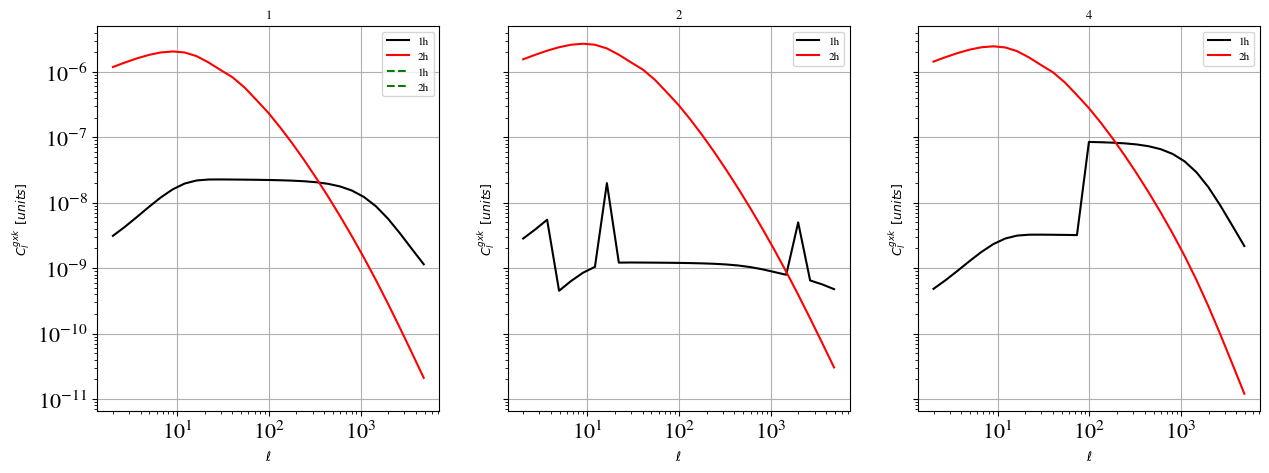

In [30]:
plot_dim = len(cl_galn_lens.keys())
fig, axes = plt.subplots(figsize=(15, 5), 
                         sharex=True, 
                         sharey=True, 
                         ncols=plot_dim
                         )
plt.subplots_adjust(#left=0.1,
#                     bottom=0.1,
#                     right=0.9,
#                     top=0.9,
#                     wspace=0.4,
                    hspace=0.4)
# x = np.linspace(0, 10, 100)
ik = 0
for i in range(plot_dim):
    kk = list(cl_galn_lens.keys())[ik]
    ik+=1
    # axes[i, j].plot(x, np.sin((i+j) *x))
    axes[i].set_title(kk,size=9)
    axes[i].set_xlabel(r"$\ell$",fontsize=9)
    axes[i].set_ylabel(r"$C_l^{gxk} \,\,\, [units]$",fontsize=9)

    axes[i].grid()
    
    cl = cl_galn_lens[kk]
    fac = np.asarray(cl['ell'])*(np.asarray(cl['ell'])+1.)/2./np.pi

    axes[i].loglog(cl['ell'],np.asarray(cl['1h'])/fac,'k-',label=r'1h')
    axes[i].loglog(cl['ell'],np.asarray(cl['2h'])/fac,'r-',label=r'2h')
    # axes[i].loglog(cl['ell'],np.asarray(cl['hf'])/fac,'k-',label=r'hf')
    if kk == '1':
        cl = cl_gal_lens
        fac = np.asarray(cl['ell'])*(np.asarray(cl['ell'])+1.)/2./np.pi

        axes[i].loglog(cl['ell'],np.asarray(cl['1h'])/fac,label=r'1h',ls='--',c='g')
        axes[i].loglog(cl['ell'],np.asarray(cl['2h'])/fac,label=r'2h',ls='--',c='g')        

    axes[i].legend(loc=1,fontsize=8)

# Halofit method for galaxy-cmb lensing power spectra

In [69]:
%%time
M = Class()
M.set(common_settings)
M.set({
'output' : 'galn_lens_hf',
'galaxy_samples_list_num' : 3, # the number of galaxy samples
'galaxy_samples_list' : '1,2,4', # the id string of each sample, can be any integer
'full_path_and_prefix_to_dndz_ngal':'/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/WISC_bin3_ngal_example'
})
M.set({# class_sz parameters:
    
'z_min' : 0.,
'z_max' : 3.,
'ndim_redshifts' : 100,
    

'effective_galaxy_bias_ngal_0' : 1.3,
'effective_galaxy_bias_ngal_1' : 1.7,
'effective_galaxy_bias_ngal_2' : 2.7,
   
    

'dlogell' : 0.3,
'ell_max' : 5000.0,
'ell_min' : 2.0,

# primordial non-Gaussianity:
'use scale dependent bias (from non Gaussianity)': 1,
'fNL' : 1e-1,
    
# precisions params:
'non_linear' : 'halofit',
'k_min_for_pk_class_sz' :  0.001,
'k_max_for_pk_class_sz' :  60.0,
'k_per_decade_class_sz' :  50,
'P_k_max_h/Mpc' :  50.0,

    
'redshift_epsabs' : 1e-40,
'redshift_epsrel' : 0.0001,


    
        })
        
M.compute()
cl_galn_lens = M.cl_galn_lens()

CPU times: user 4.69 s, sys: 25.5 ms, total: 4.72 s
Wall time: 920 ms


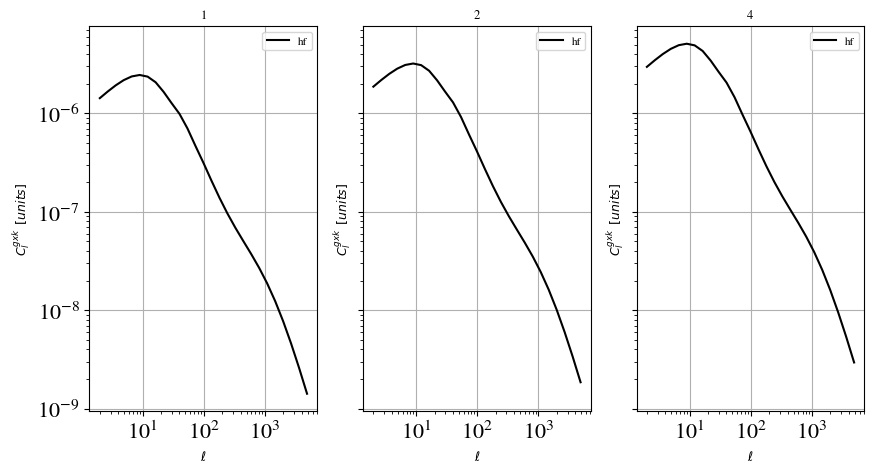

In [71]:
plot_dim = len(cl_galn_lens.keys())
fig, axes = plt.subplots(figsize=(10, 5), 
                         sharex=True, 
                         sharey=True, 
                         ncols=plot_dim
                         )
plt.subplots_adjust(#left=0.1,
#                     bottom=0.1,
#                     right=0.9,
#                     top=0.9,
#                     wspace=0.4,
                    hspace=0.4)
# x = np.linspace(0, 10, 100)
ik = 0
for i in range(plot_dim):
    kk = list(cl_galn_lens.keys())[ik]
    ik+=1
    # axes[i, j].plot(x, np.sin((i+j) *x))
    axes[i].set_title(kk,size=9)
    axes[i].set_xlabel(r"$\ell$",fontsize=9)
    axes[i].set_ylabel(r"$C_l^{gxk} \,\,\, [units]$",fontsize=9)

    axes[i].grid()
    #
    cl = cl_galn_lens[kk]
    fac = np.asarray(cl['ell'])*(np.asarray(cl['ell'])+1.)/2./np.pi

#     axes[i].loglog(cl['ell'],np.asarray(cl['1h'])/fac,'k-',label=r'1h')
#     axes[i].loglog(cl['ell'],np.asarray(cl['2h'])/fac,'r-',label=r'2h')
    axes[i].loglog(cl['ell'],np.asarray(cl['hf'])/fac,'k-',label=r'hf')
    axes[i].legend(loc=1,fontsize=8)